In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [2]:
##### Loading the models

model_lgb = joblib.load('/kaggle/input/4-1-fraud-detection-modelling-with-lightgbm/model_lightgbm.pkl')
model_xgb = joblib.load('/kaggle/input/4-2-fraud-detection-modelling-with-xgboost/model_xgboost.pkl')

# Best Results

|  Model     |   Local Score  |  Private Score   |   Public Score   |    Overfitting with Local   | 
|:----------:|:--------------:|:----------------:|:----------------:|:---------------------------:|
| LightGBM   | 0.923519       | 0.905291         | 0.927122         | 1.97%                       |
| XGBoost    | 0.938792        | 0.905261         | 0.929851         | 3.42%                       |       

**LightGBM's best submission**
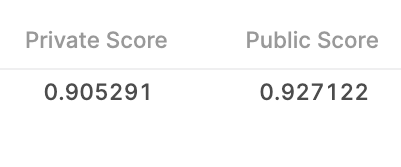

**XGBoost's best submission**
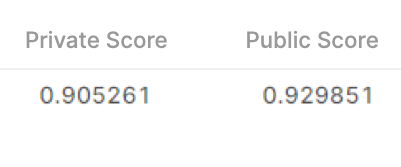

# Uplift Modeling
Segment group of transactions by fraud probability.
We are using this prescriptive tool to select the threshold that maximizes fraud detection with our model and minimizes false negatives, balancing between undetecting fraud costs versus customer disturbance and back office costs of dealing with legitimal transaction taken as fraud.

In [3]:
val_lgb = pd.read_pickle('/kaggle/input/4-1-fraud-detection-modelling-with-lightgbm/val_lgb.pkl')
val_xgb = pd.read_pickle('/kaggle/input/4-2-fraud-detection-modelling-with-xgboost/val_xgb.pkl')

In [4]:
##### LightGBM

# Get X_val | y_val | y_hat

features = ['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D3', 'D5', 'D7', 'D8', 'D9', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'D1achr', 'D2achr', 'D4achr', 'D6achr', 'D10achr', 'D11achr', 'D12achr', 'D13achr', 'D14achr', 'D15achr']
X_val = val_lgb[features]
y_val = val_lgb.isFraud
y_hat = model_lgb.predict(X_val)

# Create uplift Dataframe

uplift_lgb = pd.DataFrame()
uplift_lgb['group'] = ""
uplift_lgb['id'] = val_lgb.TransactionID
uplift_lgb['y_hat'] = y_hat
uplift_lgb['y_val'] = y_val

uplift_lgb.sort_values('y_hat', ascending = False, inplace = True)
uplift_lgb.reset_index(drop = True, inplace = True)

uplift_lgb

,group,id,y_hat,y_val
0,NaN,3545361,0.990324,1
1,NaN,3545324,0.990185,1
2,NaN,3519793,0.989834,1
3,NaN,3524375,0.989671,1
4,NaN,3519799,0.989390,1
...,...,...,...,...
92422,NaN,3555619,0.000856,0
92423,NaN,3506909,0.000852,0
92424,NaN,3543764,0.000844,0
92425,NaN,3561277,0.000815,0


In [5]:
##### LightGBM

# Groupby by percentile (0.05% of 175998 = 88)

row1 = 0
group = 0
for i in range(88,176086,88): # step, number of rows + step, step | step = number of rows per each group
    row2 = i - 1
    uplift_lgb.loc[row1:row2, 'group'] = group
    row1 = i
    group += 1
    
uplift_lgb.loc[:,'group'] = uplift_lgb['group'].fillna(method = 'ffill') # last row gets no group so I'll include it in last group available

uplift_lgb

,group,id,y_hat,y_val
0,0,3545361,0.990324,1
1,0,3545324,0.990185,1
2,0,3519793,0.989834,1
3,0,3524375,0.989671,1
4,0,3519799,0.989390,1
...,...,...,...,...
92422,1050,3555619,0.000856,0
92423,1050,3506909,0.000852,0
92424,1050,3543764,0.000844,0
92425,1050,3561277,0.000815,0


In [6]:
##### LightGBM

group_lgb = uplift_lgb.groupby('group')['y_val'].value_counts().unstack()
group_lgb = group_lgb.replace(np.nan,0)

group_lgb['fraud_rate'] = group_lgb[1] / (group_lgb[0] + group_lgb[1])
group_lgb['y_hat_mean'] = uplift_lgb.groupby('group')['y_hat'].mean()
group_lgb

y_val,0,1,fraud_rate,y_hat_mean
group,,,,
0,0.0,88.0,1.000000,0.981609
1,7.0,81.0,0.920455,0.971419
2,7.0,81.0,0.920455,0.961460
3,11.0,77.0,0.875000,0.949675
4,6.0,82.0,0.931818,0.938366
...,...,...,...,...
1046,88.0,0.0,0.000000,0.001284
1047,88.0,0.0,0.000000,0.001227
1048,88.0,0.0,0.000000,0.001161


In [7]:
##### XGBoost

# Get X_val | y_val | y_hat

features = ['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D3', 'D8', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V47', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V66', 'V67', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V85', 'V86', 'V87', 'V88', 'V90', 'V91', 'V92', 'V93', 'V94', 'V99', 'V100', 'V102', 'V106', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V115', 'V121', 'V123', 'V124', 'V129', 'V131', 'V133', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V165', 'V166', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V178', 'V179', 'V184', 'V187', 'V188', 'V189', 'V193', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V216', 'V217', 'V220', 'V223', 'V224', 'V225', 'V227', 'V231', 'V232', 'V233', 'V234', 'V235', 'V239', 'V242', 'V243', 'V244', 'V245', 'V246', 'V248', 'V249', 'V251', 'V252', 'V253', 'V254', 'V256', 'V257', 'V258', 'V259', 'V262', 'V266', 'V267', 'V268', 'V272', 'V274', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V293', 'V294', 'V295', 'V296', 'V298', 'V299', 'V300', 'V301', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V317', 'V318', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'D1achr', 'D2achr', 'D4achr', 'D6achr', 'D10achr', 'D11achr', 'D12achr', 'D13achr', 'D14achr', 'D15achr']
X_val = val_xgb[features]
y_val = val_xgb.isFraud
y_hat = model_xgb.predict_proba(X_val)

# Create uplift Dataframe

uplift_xgb = pd.DataFrame()
uplift_xgb['group'] = ""
uplift_xgb['id'] = val_xgb.TransactionID                                          
uplift_xgb['y_hat'] = y_hat[:,1]                         
uplift_xgb['y_val'] = y_val                                                                 

uplift_xgb.sort_values('y_hat', ascending = False, inplace = True)
uplift_xgb.reset_index(drop = True, inplace = True)

uplift_xgb

,group,id,y_hat,y_val
0,NaN,3522631,0.994460,1
1,NaN,3556625,0.992987,1
2,NaN,3545361,0.991688,1
3,NaN,3545962,0.991601,1
4,NaN,3519799,0.991320,1
...,...,...,...,...
92422,NaN,3508707,0.000701,0
92423,NaN,3504131,0.000696,0
92424,NaN,3511461,0.000671,0
92425,NaN,3530689,0.000669,0


In [8]:
##### XGBoost

# Groupby by percentile (0.05% of 175998 = 88)

row1 = 0
group = 0
for i in range(88,176086,88): # step, number of rows + step, step | step = number of rows per each group
    row2 = i - 1
    uplift_xgb.loc[row1:row2, 'group'] = group
    row1 = i
    group += 1
    
uplift_xgb.loc[:,'group'] = uplift_lgb['group'].fillna(method = 'ffill') # last row gets no group so I'll include it in last group available

uplift_xgb

,group,id,y_hat,y_val
0,0,3522631,0.994460,1
1,0,3556625,0.992987,1
2,0,3545361,0.991688,1
3,0,3545962,0.991601,1
4,0,3519799,0.991320,1
...,...,...,...,...
92422,1050,3508707,0.000701,0
92423,1050,3504131,0.000696,0
92424,1050,3511461,0.000671,0
92425,1050,3530689,0.000669,0


In [9]:
##### XGBoost

group_xgb = uplift_xgb.groupby('group')['y_val'].value_counts().unstack()
group_xgb = group_xgb.replace(np.nan,0)

group_xgb['fraud_rate'] = group_xgb[1] / (group_xgb[0] + group_xgb[1])
group_xgb['y_hat_mean'] = uplift_xgb.groupby('group')['y_hat'].mean()
group_xgb

y_val,0,1,fraud_rate,y_hat_mean
group,,,,
0,1.0,87.0,0.988636,0.982890
1,1.0,87.0,0.988636,0.967623
2,7.0,81.0,0.920455,0.951563
3,11.0,77.0,0.875000,0.933900
4,6.0,82.0,0.931818,0.914201
...,...,...,...,...
1046,88.0,0.0,0.000000,0.001030
1047,88.0,0.0,0.000000,0.000990
1048,88.0,0.0,0.000000,0.000940


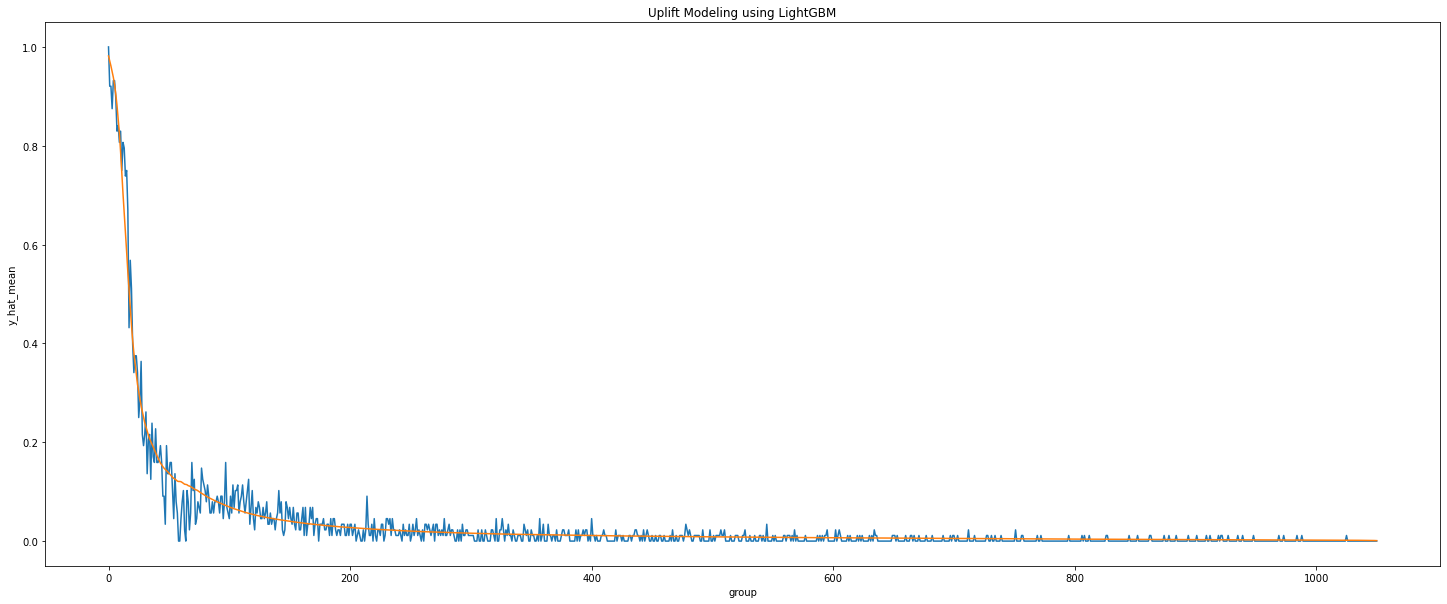

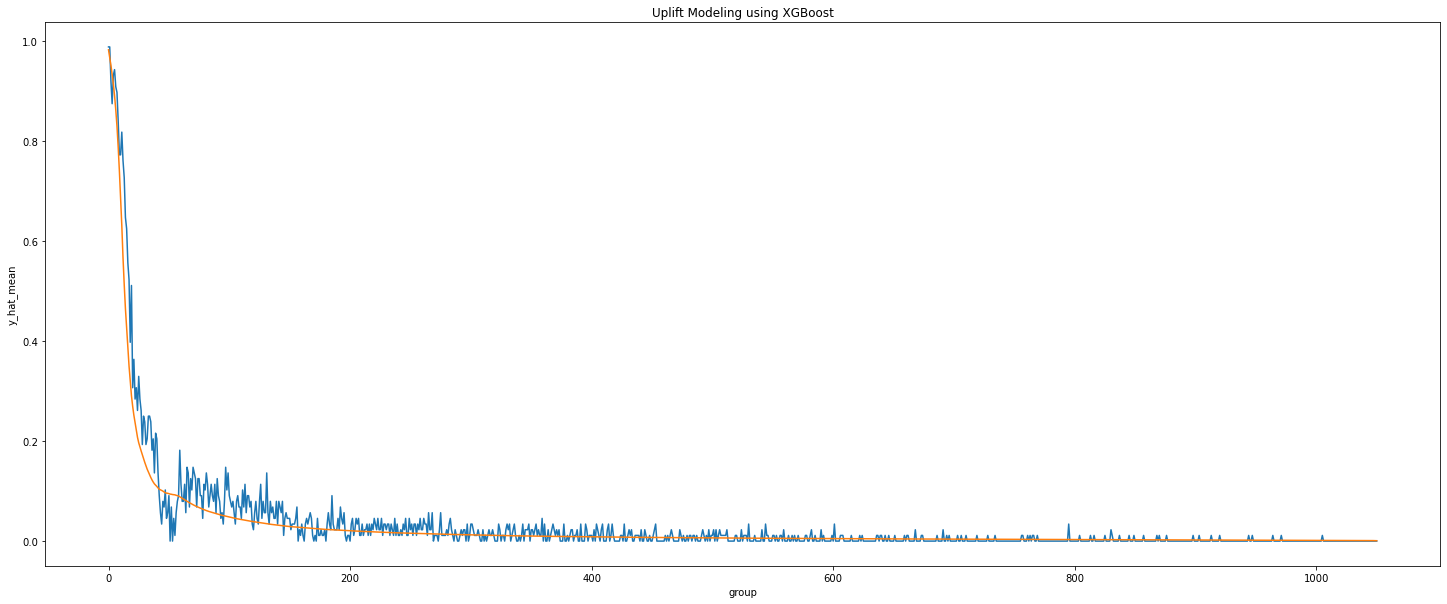

In [10]:
##### Plotting both models

# LightGBM
plt.figure(figsize = [25,10])
sns.lineplot(group_lgb.index, group_lgb['fraud_rate'])    # (true) percentage fraud in the transaction cuantiles
sns.lineplot(group_lgb.index, group_lgb['y_hat_mean'])    # (predicted) average predicted fraud in the transaction cuantiles
plt.title('Uplift Modeling using LightGBM')
plt.show()

# XGBoost
plt.figure(figsize = [25,10])
sns.lineplot(group_xgb.index, group_xgb['fraud_rate'])    # (true) percentage fraud in the transaction cuantiles
sns.lineplot(group_xgb.index, group_xgb['y_hat_mean'])    # (predicted) average predicted fraud in the transaction cuantiles
plt.title('Uplift Modeling using XGBoost')
plt.show()